In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from datetime import datetime

In [4]:
toy_data = {'Grower':['Bobby', 'Jess', 'Julio', 'Mark'],
        'Day Planted':[20, 25, 19, 18],
        'Amount':[5, 8, 6, 7], 
        'Expected Grow Time':[250, 245, 245, 245]}

In [5]:
data_G = pd.read_csv("grower_list.csv")

In [6]:
df_G = pd.DataFrame(data_G)

In [7]:
df_G.head()

,Site No.,Address,Med_Rec,Grower Class,Num Plants
0,1,"1680 B Marquette Avenue Bay City, MI",Medical,C,1500
1,2,"1204 West US Highway 2 Germfask, MI",Medical,C,1500
2,3,"1230 Mason Court Webberville, MI",Medical,C,1500
3,4,"34280 56th Street Bangor, MI",Medical,C,1500
4,5,"21055 E M48 Detour, MI",Medical,C,1500


In [8]:
df_A = pd.read_csv("assumptions.csv")

In [9]:
df_A

,#,Grow type,Weeks to harvest (low),Weeks to harvest (high),Begin week (low),Begin week (high),Ounces per plant (low),Ounces per plant (high)
0,1,Outdoor,24,32,13,24,10,17
1,2,Indoor - seed,12,16,1,26,5,15
2,3,Indoor - clone,9,16,1,26,5,15


In [10]:
np.random.seed(int(datetime.now().timestamp()))

In [11]:
random = np.random.randint(0, 3, size=len(df_G))

In [12]:
start = []; grow_time = []; plant_size = [];

In [13]:
# for i in random:
#     if i == 0: 
#         start.append(np.random.normal(np.mean([df_A['Begin week (low)'][0], df_A['Begin week (high)'][0]])))
#         grow_time.append(np.random.normal(np.mean([df_A['Weeks to harvest (low)'][0], df_A['Weeks to harvest (high)'][0]])))
#         plant_size.append(np.random.normal(np.mean([df_A['Ounces per plant (low)'][0], df_A['Ounces per plant (high)'][0]])))
#     elif i == 1:
#         start.append(np.random.normal(np.mean([df_A['Begin week (low)'][1], df_A['Begin week (high)'][1]]))) 
#         grow_time.append(np.random.normal(np.mean([df_A['Weeks to harvest (low)'][1], df_A['Weeks to harvest (high)'][1]])))
#         plant_size.append(np.random.normal(np.mean([df_A['Ounces per plant (low)'][1], df_A['Ounces per plant (high)'][1]])))
#     else:
#         start.append(np.random.normal(np.mean([df_A['Begin week (low)'][2], df_A['Begin week (high)'][2]])))
#         grow_time.append(np.random.normal(np.mean([df_A['Weeks to harvest (low)'][2], df_A['Weeks to harvest (high)'][2]])))
#         plant_size.append(np.random.normal(np.mean([df_A['Ounces per plant (low)'][2], df_A['Ounces per plant (high)'][2]])))

In [14]:
for i in random:
    start.append(np.random.uniform(np.mean([df_A['Begin week (low)'][i], df_A['Begin week (high)'][i]])))
    grow_time.append(np.random.normal(np.mean([df_A['Weeks to harvest (low)'][i], df_A['Weeks to harvest (high)'][i]])))
    plant_size.append(np.random.normal(np.mean([df_A['Ounces per plant (low)'][i], df_A['Ounces per plant (high)'][i]])))

In [15]:
df_G['Start Date'] = np.round(start).astype(int)

In [16]:
df_G['Grow Time'] = np.round(grow_time)

In [17]:
df_G['Plant Size'] = np.round(plant_size)

In [18]:
df_G['Harvest Date'] = (df_G['Start Date'] + df_G['Grow Time']).astype(int)

In [19]:
df_G.head()

,Site No.,Address,Med_Rec,Grower Class,Num Plants,Start Date,Grow Time,Plant Size,Harvest Date
0,1,"1680 B Marquette Avenue Bay City, MI",Medical,C,1500,13,14.0,10.0,27
1,2,"1204 West US Highway 2 Germfask, MI",Medical,C,1500,9,14.0,9.0,23
2,3,"1230 Mason Court Webberville, MI",Medical,C,1500,5,11.0,9.0,16
3,4,"34280 56th Street Bangor, MI",Medical,C,1500,3,14.0,11.0,17
4,5,"21055 E M48 Detour, MI",Medical,C,1500,4,13.0,9.0,17


In [20]:
df_G.sort_values(by=['Harvest Date']).head()

,Site No.,Address,Med_Rec,Grower Class,Num Plants,Start Date,Grow Time,Plant Size,Harvest Date
219,220,"651 Eden Way Chesaning, MI",Medical,C,1500,1,12.0,11.0,13
269,270,"1060 River Road West Battle Creek, MI",Medical,B,1000,1,12.0,10.0,13
53,54,"206 West Park Drive Kalkaska, MI",Medical,C,1500,2,11.0,10.0,13
9,10,"707 Industrial Park Drive Bangor, MI",Medical,A,500,2,11.0,9.0,13
197,198,"24685 County Road 681 RD Arlington,MI 49013",Adult,C,1500,2,11.0,10.0,13


In [21]:
df_G.groupby(by=['Harvest Date'])['Plant Size'].sum().reset_index().head()

,Harvest Date,Plant Size
0,13,50.0
1,14,61.0
2,15,97.0
3,16,165.0
4,17,245.0


In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Ounces of Plant Harvested')

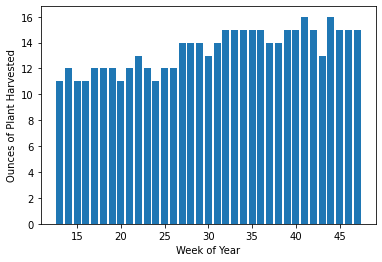

In [23]:
plt.bar(df_G['Harvest Date'], df_G['Plant Size']); plt.xlabel("Week of Year"); plt.ylabel("Ounces of Plant Harvested")